In [30]:
import pandas as pd
df =  pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
import numpy as np

In [29]:
from sklearn.model_selection import train_test_split

In [32]:
target = df['Outcome']
cel = df.drop('Outcome',axis = 1)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(cel,target,test_size = 0.20)

In [40]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree_param = [{'criterion': ['entropy', 'gini'], 'max_depth': [i for i in range(1, 20)],
              'min_samples_leaf': [i for i in range(1, 25)],
               'max_leaf_nodes': [i for i in range(1, 20)]}]

In [43]:
dtc_model = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=10)
dtc_model.fit(X = X_train.values,
          y = y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9120 fits failed out of a total of 173280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9120 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in 

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                        13, 14, 15, 16, 17, 18, 19],
                          'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                             12, 13, 14, 15, 16, 17, 18, 19],
                          'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24]}])

In [47]:
prediction_clf = dtc_model.best_estimator_.predict(X_test)
score = accuracy_score(y_test, prediction_clf)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [67]:
print(f'Лучшие найденные параметры: {dtc_model.best_estimator_}')
print(f'Точность на тренировочных данных: {round(dtc_model.best_score_*100, 2)}')
print(f'Точность на тестовых данных: {round(score*100, 2)}')

Лучшие найденные параметры: DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=15,
                       min_samples_leaf=5)
Точность на тренировочных данных: 78.68
Точность на тестовых данных: 73.38


In [50]:
X_new = np.array([[6, 85, 72, 23, 0, 28.1, 0.627, 33]])

In [53]:
X_old = np.array([[0,	137,	40,	35,	168,	43.1,	2.288,	33]])

In [51]:
pred = dtc_model.predict(X_new)

In [54]:
predi = dtc_model.predict(X_old)

In [52]:
print(f"Прогноз: {pred}")

Прогноз: [0]


In [55]:
print(f"Прогноз: {predi}")

Прогноз: [1]


[Text(0.4666666666666667, 0.9375, 'x[1] <= 127.5\nentropy = 0.943\nsamples = 614\nvalue = [393, 221]'),
 Text(0.2, 0.8125, 'x[5] <= 26.45\nentropy = 0.718\nsamples = 384\nvalue = [308, 76]'),
 Text(0.13333333333333333, 0.6875, 'entropy = 0.072\nsamples = 115\nvalue = [114, 1]'),
 Text(0.26666666666666666, 0.6875, 'x[7] <= 28.5\nentropy = 0.854\nsamples = 269\nvalue = [194, 75]'),
 Text(0.13333333333333333, 0.5625, 'x[5] <= 31.4\nentropy = 0.586\nsamples = 142\nvalue = [122, 20]'),
 Text(0.06666666666666667, 0.4375, 'entropy = 0.146\nsamples = 48\nvalue = [47, 1]'),
 Text(0.2, 0.4375, 'entropy = 0.726\nsamples = 94\nvalue = [75, 19]'),
 Text(0.4, 0.5625, 'x[1] <= 99.5\nentropy = 0.987\nsamples = 127\nvalue = [72, 55]'),
 Text(0.3333333333333333, 0.4375, 'entropy = 0.669\nsamples = 40\nvalue = [33, 7]'),
 Text(0.4666666666666667, 0.4375, 'x[6] <= 0.252\nentropy = 0.992\nsamples = 87\nvalue = [39, 48]'),
 Text(0.4, 0.3125, 'entropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(0.5333333

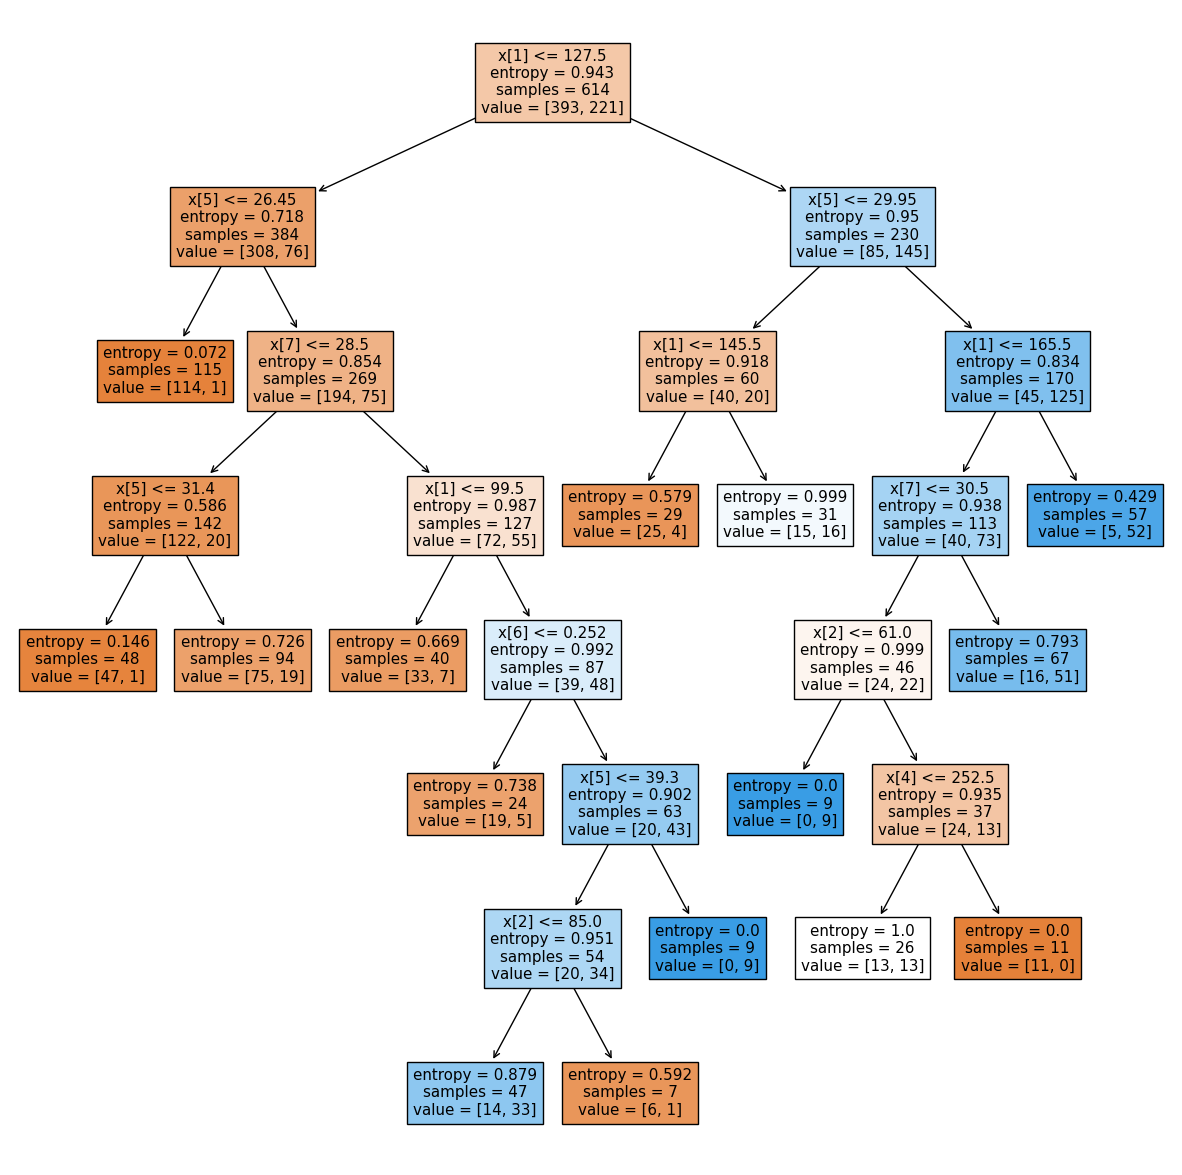

In [71]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtc_model.best_estimator_, filled=True, impurity=True)

In [78]:
from dtreeviz.trees import dtreeviz

image_est = dtreeviz(dtc_model.best_estimator_,
               x_data=X_train,
               y_data=y_train,
               target_name='class',
               feature_names=[i for i in X_train.columns],
               class_names=['Не диабет', 'Диабет'],
               title="Визуализация подбора весов Decision Tree")
image_est.save('dtreeviz.svg')

ImportError: ignored